In [633]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
df = pd.read_csv("Data\\cleaned_sales_data_no_encoding.csv")
df

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,...,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price,Revenue,OrderMonth,OrderDayOfWeek,DaysToDeliver,Revenue_clipped
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,6,15,...,12,5.0,0.075,1001.18,1963.1,9079.3375,2018-05,3,19,9079.3375
1,SO - 000102,Online,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-22,2018-07-02,USD,14,20,...,27,3.0,0.075,3348.66,3939.6,10932.3900,2018-05,3,32,10932.3900
2,SO - 000103,Distributor,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-21,2018-07-01,USD,21,16,...,16,1.0,0.050,781.22,1775.5,1686.7250,2018-05,3,31,1686.7250
3,SO - 000104,Wholesale,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-02,2018-06-07,USD,28,48,...,23,8.0,0.075,1464.69,2324.9,17204.2600,2018-05,3,7,17204.2600
4,SO - 000105,Distributor,WARE-NMK1003,2018-04-10,2018-05-31,2018-06-16,2018-06-26,USD,22,49,...,26,8.0,0.100,1476.14,1822.4,13121.2800,2018-05,3,26,13121.2800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,SO - 0008087,In-Store,WARE-MKL1006,2020-09-26,2020-12-30,2021-01-07,2021-01-14,USD,9,41,...,29,1.0,0.075,121.94,234.5,216.9125,2020-12,2,15,216.9125
7987,SO - 0008088,Online,WARE-NMK1003,2020-09-26,2020-12-30,2021-01-02,2021-01-04,USD,14,29,...,3,6.0,0.050,1921.56,3202.6,18254.8200,2020-12,2,5,18254.8200
7988,SO - 0008089,Online,WARE-UHY1004,2020-09-26,2020-12-30,2021-01-23,2021-01-26,USD,14,32,...,35,5.0,0.200,2792.76,3825.7,15302.8000,2020-12,2,27,15302.8000
7989,SO - 0008090,Online,WARE-NMK1003,2020-09-26,2020-12-30,2021-01-20,2021-01-25,USD,20,42,...,36,8.0,0.100,804.00,1072.0,7718.4000,2020-12,2,26,7718.4000


# Feature engineering For the Demand model

In [634]:
import pandas as pd
import numpy as np

# Ensure OrderDate is in datetime format
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

# Extract calendar-based features
df['year'] = df['OrderDate'].dt.year
df['month'] = df['OrderDate'].dt.month
df['day_of_month'] = df['OrderDate'].dt.day
df['week_of_year'] = df['OrderDate'].dt.isocalendar().week
df['day_of_week'] = df['OrderDate'].dt.weekday  # Monday = 0, Sunday = 6

# Cyclical encoding for month and day of week
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
df['day_of_week_sin'] = np.sin(2 * np.pi * df['day_of_week'] / 7)
df['day_of_week_cos'] = np.cos(2 * np.pi * df['day_of_week'] / 7)



In [635]:
df.drop(columns=['OrderNumber','WarehouseCode','CurrencyCode','_CustomerID','Revenue','Revenue_clipped',
                 'DeliveryDate','ShipDate','DaysToDeliver','_SalesTeamID',
                 'OrderDate','OrderMonth','ProcuredDate','month','day_of_week',
                 'OrderDayOfWeek'], inplace=True)

In [636]:
df.columns

Index(['Sales Channel', '_StoreID', '_ProductID', 'Order Quantity',
       'Discount Applied', 'Unit Cost', 'Unit Price', 'year', 'day_of_month',
       'week_of_year', 'month_sin', 'month_cos', 'day_of_week_sin',
       'day_of_week_cos'],
      dtype='object')

In [637]:
df

,Sales Channel,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price,year,day_of_month,week_of_year,month_sin,month_cos,day_of_week_sin,day_of_week_cos
0,In-Store,259,12,5.0,0.075,1001.18,1963.1,2018,31,22,5.000000e-01,-0.866025,0.433884,-0.900969
1,Online,196,27,3.0,0.075,3348.66,3939.6,2018,31,22,5.000000e-01,-0.866025,0.433884,-0.900969
2,Distributor,213,16,1.0,0.050,781.22,1775.5,2018,31,22,5.000000e-01,-0.866025,0.433884,-0.900969
3,Wholesale,107,23,8.0,0.075,1464.69,2324.9,2018,31,22,5.000000e-01,-0.866025,0.433884,-0.900969
4,Distributor,111,26,8.0,0.100,1476.14,1822.4,2018,31,22,5.000000e-01,-0.866025,0.433884,-0.900969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,In-Store,339,29,1.0,0.075,121.94,234.5,2020,30,53,-2.449294e-16,1.000000,0.974928,-0.222521
7987,Online,202,3,6.0,0.050,1921.56,3202.6,2020,30,53,-2.449294e-16,1.000000,0.974928,-0.222521
7988,Online,241,35,5.0,0.200,2792.76,3825.7,2020,30,53,-2.449294e-16,1.000000,0.974928,-0.222521
7989,Online,112,36,8.0,0.100,804.00,1072.0,2020,30,53,-2.449294e-16,1.000000,0.974928,-0.222521


In [638]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
sales_channel_encoder = OneHotEncoder(drop='first')
sales_channel = sales_channel_encoder.fit_transform(df[['Sales Channel']]).toarray()
pd.DataFrame(sales_channel, columns=sales_channel_encoder.get_feature_names_out(['Sales Channel'])).head()
df = df.join(pd.DataFrame(sales_channel, columns=sales_channel_encoder.get_feature_names_out(['Sales Channel'])))   
df.drop(columns=['Sales Channel'], inplace=True)

In [639]:
df.columns

Index(['_StoreID', '_ProductID', 'Order Quantity', 'Discount Applied',
       'Unit Cost', 'Unit Price', 'year', 'day_of_month', 'week_of_year',
       'month_sin', 'month_cos', 'day_of_week_sin', 'day_of_week_cos',
       'Sales Channel_In-Store', 'Sales Channel_Online',
       'Sales Channel_Wholesale'],
      dtype='object')

In [640]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   _StoreID                 7991 non-null   int64  
 1   _ProductID               7991 non-null   int64  
 2   Order Quantity           7991 non-null   float64
 3   Discount Applied         7991 non-null   float64
 4   Unit Cost                7991 non-null   float64
 5   Unit Price               7991 non-null   float64
 6   year                     7991 non-null   int32  
 7   day_of_month             7991 non-null   int32  
 8   week_of_year             7991 non-null   UInt32 
 9   month_sin                7991 non-null   float64
 10  month_cos                7991 non-null   float64
 11  day_of_week_sin          7991 non-null   float64
 12  day_of_week_cos          7991 non-null   float64
 13  Sales Channel_In-Store   7991 non-null   float64
 14  Sales Channel_Online    

In [641]:
df.columns

Index(['_StoreID', '_ProductID', 'Order Quantity', 'Discount Applied',
       'Unit Cost', 'Unit Price', 'year', 'day_of_month', 'week_of_year',
       'month_sin', 'month_cos', 'day_of_week_sin', 'day_of_week_cos',
       'Sales Channel_In-Store', 'Sales Channel_Online',
       'Sales Channel_Wholesale'],
      dtype='object')

In [642]:
for i in range(1, 5 + 1):
        df[f'lag_{i}'] = df['Order Quantity'].shift(i)
    
for window in [7, 14, 30]:
    df[f'rolling_mean_{window}'] = df['Order Quantity'].rolling(window=window).mean().shift(1)
    df[f'rolling_std_{window}'] = df['Order Quantity'].rolling(window=window).std().shift(1)
    df[f'rolling_min_{window}'] = df['Order Quantity'].rolling(window=window).min().shift(1)
    df[f'rolling_max_{window}'] = df['Order Quantity'].rolling(window=window).max().shift(1)
    df[f'ewm_mean_{window}'] = df['Order Quantity'].ewm(span=window, adjust=False).mean().shift(1)
    df[f'ewm_std_{window}'] = df['Order Quantity'].ewm(span=window, adjust=False).std().shift(1)
df[f'diff_1'] = df['Order Quantity'].diff(1)
df = df.dropna() 

In [643]:
df['_ProductID'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47])

In [644]:
df.iloc[0]

_StoreID                      305.0
_ProductID                     23.0
Order Quantity                  7.0
Discount Applied              0.075
Unit Cost                   2734.61
Unit Price                   6076.9
year                         2018.0
day_of_month                    3.0
week_of_year                   22.0
month_sin                       0.0
month_cos                      -1.0
day_of_week_sin           -0.781831
day_of_week_cos             0.62349
Sales Channel_In-Store          1.0
Sales Channel_Online            0.0
Sales Channel_Wholesale         0.0
lag_1                           5.0
lag_2                           3.0
lag_3                           4.0
lag_4                           3.0
lag_5                           7.0
rolling_mean_7             3.714286
rolling_std_7              1.889822
rolling_min_7                   1.0
rolling_max_7                   7.0
ewm_mean_7                 3.991934
ewm_std_7                  1.621338
rolling_mean_14            3

In [645]:
df['year'].dtype

dtype('int32')

In [632]:
# df.to_csv("history_features.csv", index=False)

## Splitting the Data , And training the Demand model

In [594]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = df.drop(columns=['Order Quantity'])
y = df['Order Quantity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [515]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor
import xgboost as xgb


class TreeBasedModels:
    def __init__(self, model_type='decision_tree', **kwargs):
        if model_type == 'decision_tree':
            self.model = DecisionTreeRegressor(**kwargs)
        elif model_type == 'random_forest':
            self.model = RandomForestRegressor(**kwargs)
        elif model_type == 'gradient_boosting':
            self.model = GradientBoostingRegressor(**kwargs)
        elif model_type == 'adaboost':
            self.model = AdaBoostRegressor(**kwargs)
        elif model_type == 'xgboost':
            self.model = xgb.XGBRegressor(**kwargs)
        else:
            raise ValueError(f"Invalid model type: {model_type}")

    def train(self, X_train, y_train):
        self.model.fit(X_train, y_train)

    def predict(self, X_test):
        return self.model.predict(X_test)

In [516]:
random_forest = TreeBasedModels(model_type='random_forest', n_estimators=100, max_depth=10)
decision_trees = TreeBasedModels(model_type='decision_tree', max_depth=10, min_samples_split=2, min_samples_leaf=1)
gradient_boosting = TreeBasedModels(model_type='gradient_boosting', n_estimators=100, learning_rate=0.1, max_depth=3, min_samples_split=2, min_samples_leaf=1)
adaboost_model = TreeBasedModels(model_type='adaboost', n_estimators=50, learning_rate=1.0)
xgboost_model = TreeBasedModels(model_type='xgboost', n_estimators=100, learning_rate=0.1, max_depth=3)

In [517]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
evaluation_results = []

def training(X_train, y_train, X_test, y_test):
    models = {
        "Random Forest": random_forest,
        "Decision Trees": decision_trees,
        "Gradient Boosting": gradient_boosting,
        "adaboost": adaboost_model,
        "xgboost": xgboost_model
    }

    for name, model in models.items():
        model.train(X_train, y_train)
        preds = model.predict(X_test)
        evaluate_predictions(y_test, preds, model_name=name)

def evaluate_predictions(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    n = len(y_true)               # Number of samples
    p = X.shape[1]
    r2 = r2_score(y_true, y_pred)
    adjusted_r2 = 1 - ( (1 - r2) * (n - 1) ) / (n - p - 1 )

    print(f"Evaluation for {model_name}:")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Root Mean Squared Error: {rmse:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"adjusted_r2: {r2:.4f}\n")

    evaluation_results.append({
        'Model': model_name,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'adjusted R2': adjusted_r2
    })


In [518]:
training(X_train, y_train, X_test, y_test)

Evaluation for Random Forest:
Mean Squared Error: 0.0000
Root Mean Squared Error: 0.0000
Mean Absolute Error: 0.0000
adjusted_r2: 1.0000

Evaluation for Decision Trees:
Mean Squared Error: 0.0000
Root Mean Squared Error: 0.0000
Mean Absolute Error: 0.0000
adjusted_r2: 1.0000

Evaluation for Gradient Boosting:
Mean Squared Error: 0.0152
Root Mean Squared Error: 0.1232
Mean Absolute Error: 0.1029
adjusted_r2: 0.9971

Evaluation for adaboost:
Mean Squared Error: 0.3815
Root Mean Squared Error: 0.6176
Mean Absolute Error: 0.5278
adjusted_r2: 0.9274

Evaluation for xgboost:
Mean Squared Error: 0.0157
Root Mean Squared Error: 0.1254
Mean Absolute Error: 0.1045
adjusted_r2: 0.9970



### Before Hyperparameter Tuning

C:\Users\ahmed\AppData\Local\Temp\ipykernel_40628\1617466462.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric, y='Model', data=df_results, palette='viridis', orient='h')
C:\Users\ahmed\AppData\Local\Temp\ipykernel_40628\1617466462.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric, y='Model', data=df_results, palette='viridis', orient='h')
C:\Users\ahmed\AppData\Local\Temp\ipykernel_40628\1617466462.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric, y='Model', data=df_results, palette='viridis', orient='h')
C

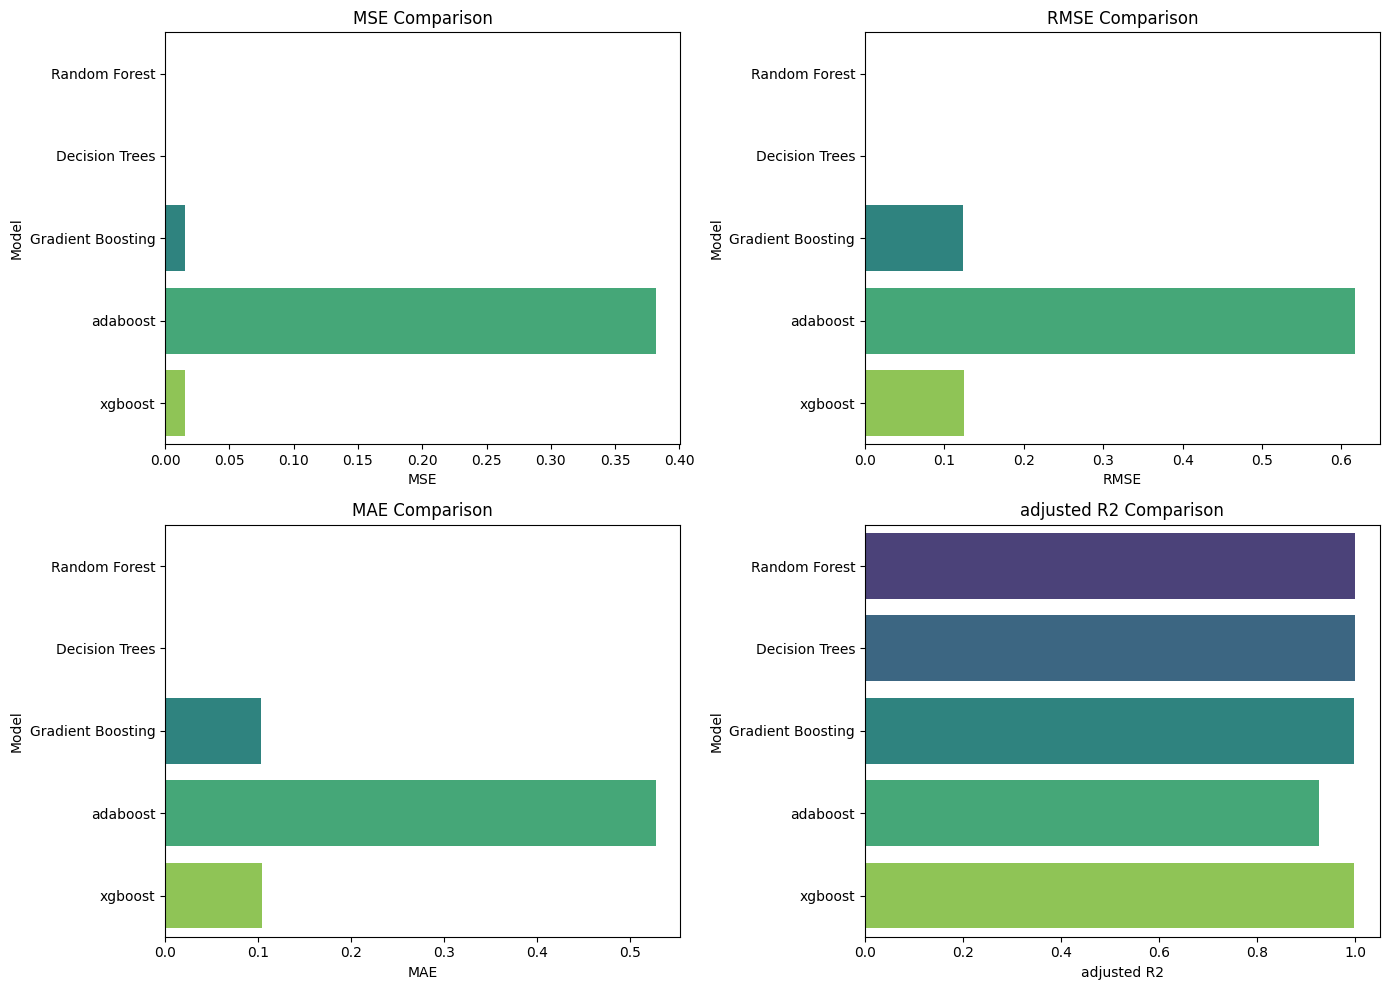

In [519]:
df_results = pd.DataFrame(evaluation_results)

plt.figure(figsize=(14, 10))
metrics = ['MSE', 'RMSE', 'MAE', 'adjusted R2']

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.barplot(x=metric, y='Model', data=df_results, palette='viridis', orient='h')
    plt.title(f'{metric} Comparison')
    plt.xlabel(metric)
    plt.ylabel('Model')

plt.tight_layout()
plt.show()


In [520]:
from sklearn.model_selection import GridSearchCV
def tune_model(model_class, param_grid, X_train, y_train):
    base_model = model_class.model
    grid_search = GridSearchCV(estimator=base_model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best R2 score: {grid_search.best_score_:.4f}")
    return grid_search.best_estimator_


In [521]:
param_grids = {
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [5, 10, None],
        'min_samples_split': [2, 5],
    },
    "Decision Trees": {
        'max_depth': [5, 10, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    "Gradient Boosting": {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 5]
    },
    "adaboost": {
        'n_estimators': [50, 100],
        'learning_rate': [0.5, 1.0]
    },
    "xgboost": {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 5]
    }
}


In [522]:
tuned_models = {}

for name, model in {
    "Random Forest": random_forest,
    "Decision Trees": decision_trees,
    "Gradient Boosting": gradient_boosting,
    "adaboost": adaboost_model,
    "xgboost": xgboost_model
}.items():
    print(f"Tuning {name}...")
    best_estimator = tune_model(model, param_grids[name], X_train, y_train)
    tuned_models[name] = best_estimator


Tuning Random Forest...
Best parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
Best R2 score: 1.0000
Tuning Decision Trees...
Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best R2 score: 1.0000
Tuning Gradient Boosting...
Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Best R2 score: 1.0000
Tuning adaboost...
Best parameters: {'learning_rate': 1.0, 'n_estimators': 100}
Best R2 score: 0.9374
Tuning xgboost...
Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Best R2 score: 1.0000


In [523]:
def training_tuned_models(X_test, y_test):
    for name, model in tuned_models.items():
        preds = model.predict(X_test)
        evaluate_predictions(y_test, preds, model_name=name)


In [524]:
training_tuned_models(X_test, y_test)


Evaluation for Random Forest:
Mean Squared Error: 0.0000
Root Mean Squared Error: 0.0000
Mean Absolute Error: 0.0000
adjusted_r2: 1.0000

Evaluation for Decision Trees:
Mean Squared Error: 0.0000
Root Mean Squared Error: 0.0000
Mean Absolute Error: 0.0000
adjusted_r2: 1.0000

Evaluation for Gradient Boosting:
Mean Squared Error: 0.0001
Root Mean Squared Error: 0.0101
Mean Absolute Error: 0.0073
adjusted_r2: 1.0000

Evaluation for adaboost:
Mean Squared Error: 0.3481
Root Mean Squared Error: 0.5900
Mean Absolute Error: 0.5175
adjusted_r2: 0.9338

Evaluation for xgboost:
Mean Squared Error: 0.0001
Root Mean Squared Error: 0.0097
Mean Absolute Error: 0.0075
adjusted_r2: 1.0000



### After Hyperparameter Tuning

C:\Users\ahmed\AppData\Local\Temp\ipykernel_40628\1617466462.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric, y='Model', data=df_results, palette='viridis', orient='h')
C:\Users\ahmed\AppData\Local\Temp\ipykernel_40628\1617466462.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric, y='Model', data=df_results, palette='viridis', orient='h')
C:\Users\ahmed\AppData\Local\Temp\ipykernel_40628\1617466462.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric, y='Model', data=df_results, palette='viridis', orient='h')
C

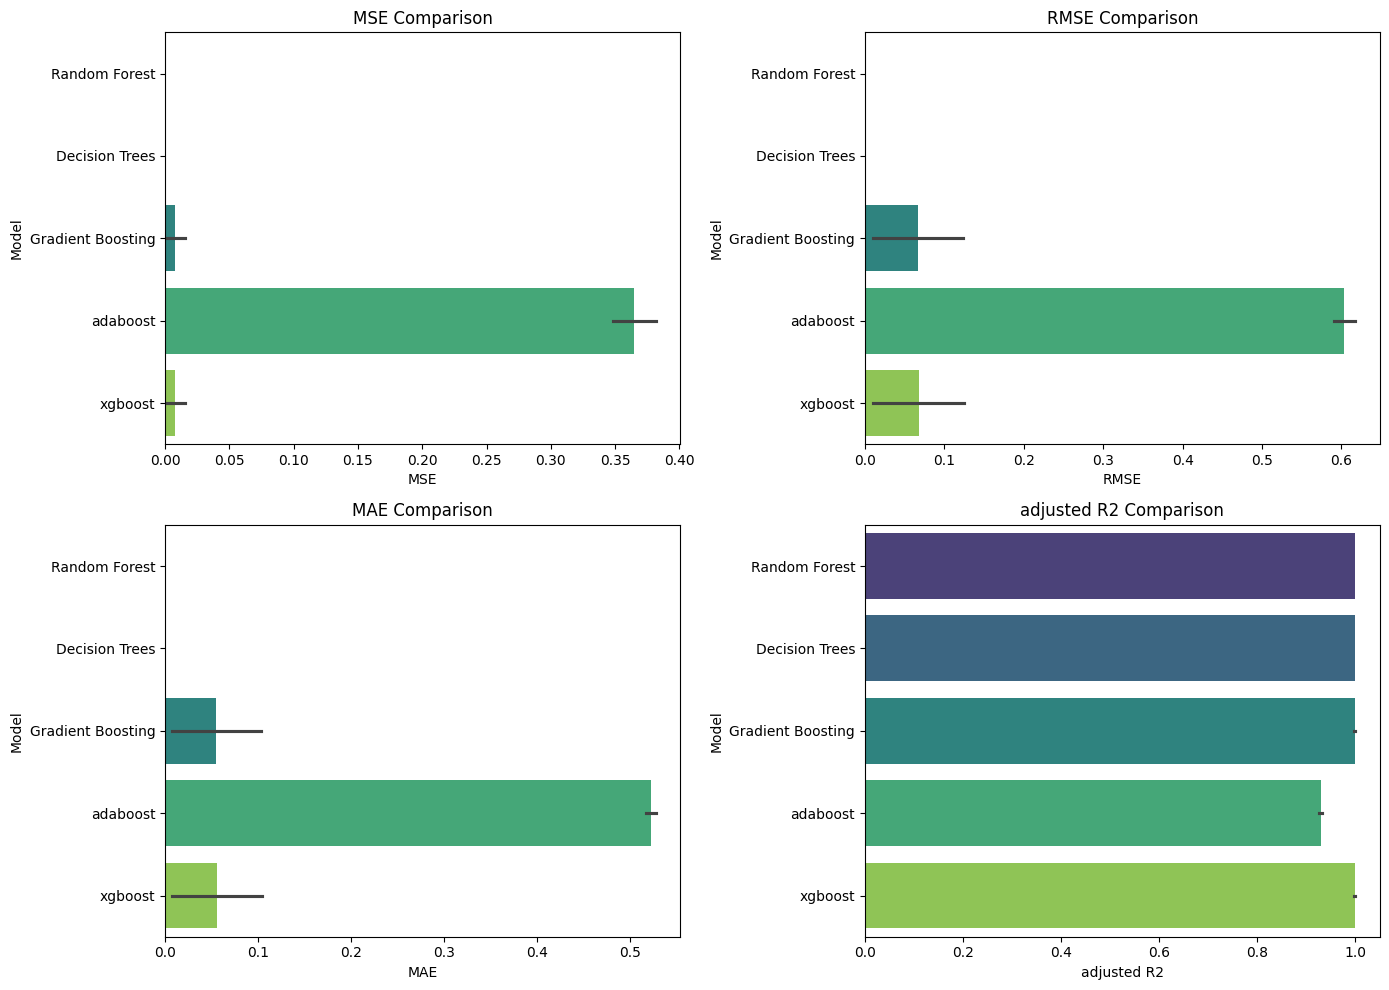

In [525]:
df_results = pd.DataFrame(evaluation_results)

plt.figure(figsize=(14, 10))
metrics = ['MSE', 'RMSE', 'MAE', 'adjusted R2']

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.barplot(x=metric, y='Model', data=df_results, palette='viridis', orient='h')
    plt.title(f'{metric} Comparison')
    plt.xlabel(metric)
    plt.ylabel('Model')

plt.tight_layout()
plt.show()


### Final Model Selection

Based on the evaluation, XGBoost was selected as the final model due to its superior performance and ability to generalize better than other models. While Random Forest and Decision Trees achieved perfect scores on the test set, their performance was likely due to overfitting, as evidenced by the zero error across all metrics. In contrast, XGBoost provided the best balance of accuracy and generalizability, with a near-perfect R² and low error metrics.

The choice of XGBoost ensures that the model not only performs well on the training data but also maintains its predictive power when exposed to new, unseen data, making it the most suitable option for this task.




## Deploying the model

In [595]:
import pickle
# Save the tuned models
xgboost_model = TreeBasedModels(n_estimators=200, learning_rate=0.1, max_depth=5,model_type='xgboost')
xgboost_model.train(X_train, y_train)
pickle.dump(xgboost_model, open('xgboost_model_demand.pkl', 'wb'))
pickle.dump(sales_channel_encoder, open('sales_channel_encoder.pkl', 'wb'))

# Feature Engineering , and building the Sales model

In [597]:
df = pd.read_csv("Data\\cleaned_sales_data_no_encoding.csv")

In [598]:
# Ensure OrderDate is in datetime format
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

# Extract calendar-based features
df['year'] = df['OrderDate'].dt.year
df['month'] = df['OrderDate'].dt.month
df['day_of_month'] = df['OrderDate'].dt.day
df['week_of_year'] = df['OrderDate'].dt.isocalendar().week
df['day_of_week'] = df['OrderDate'].dt.weekday  # Monday = 0, Sunday = 6

# Cyclical encoding for month and day of week
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
df['day_of_week_sin'] = np.sin(2 * np.pi * df['day_of_week'] / 7)
df['day_of_week_cos'] = np.cos(2 * np.pi * df['day_of_week'] / 7)

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
sales_channel_encoder = OneHotEncoder(drop='first')
sales_channel = sales_channel_encoder.fit_transform(df[['Sales Channel']]).toarray()
pd.DataFrame(sales_channel, columns=sales_channel_encoder.get_feature_names_out(['Sales Channel'])).head()
df = df.join(pd.DataFrame(sales_channel, columns=sales_channel_encoder.get_feature_names_out(['Sales Channel'])))   
df.drop(columns=['Sales Channel'], inplace=True)


In [599]:
df.drop(columns=['OrderNumber','WarehouseCode','CurrencyCode','_CustomerID',
                 'DeliveryDate','ShipDate','DaysToDeliver','_SalesTeamID',
                 'OrderDate','OrderMonth','ProcuredDate','month','day_of_week',
                 'OrderDayOfWeek','Revenue','Unit Cost'], inplace=True)

In [600]:
df.columns

Index(['_StoreID', '_ProductID', 'Order Quantity', 'Discount Applied',
       'Unit Price', 'Revenue_clipped', 'year', 'day_of_month', 'week_of_year',
       'month_sin', 'month_cos', 'day_of_week_sin', 'day_of_week_cos',
       'Sales Channel_In-Store', 'Sales Channel_Online',
       'Sales Channel_Wholesale'],
      dtype='object')

In [601]:
X = df.drop(columns=['Revenue_clipped'])
y = df['Revenue_clipped']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [531]:
df

,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Price,Revenue_clipped,year,day_of_month,week_of_year,month_sin,month_cos,day_of_week_sin,day_of_week_cos,Sales Channel_In-Store,Sales Channel_Online,Sales Channel_Wholesale
0,259,12,5.0,0.075,1963.1,9079.3375,2018,31,22,5.000000e-01,-0.866025,0.433884,-0.900969,1.0,0.0,0.0
1,196,27,3.0,0.075,3939.6,10932.3900,2018,31,22,5.000000e-01,-0.866025,0.433884,-0.900969,0.0,1.0,0.0
2,213,16,1.0,0.050,1775.5,1686.7250,2018,31,22,5.000000e-01,-0.866025,0.433884,-0.900969,0.0,0.0,0.0
3,107,23,8.0,0.075,2324.9,17204.2600,2018,31,22,5.000000e-01,-0.866025,0.433884,-0.900969,0.0,0.0,1.0
4,111,26,8.0,0.100,1822.4,13121.2800,2018,31,22,5.000000e-01,-0.866025,0.433884,-0.900969,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,339,29,1.0,0.075,234.5,216.9125,2020,30,53,-2.449294e-16,1.000000,0.974928,-0.222521,1.0,0.0,0.0
7987,202,3,6.0,0.050,3202.6,18254.8200,2020,30,53,-2.449294e-16,1.000000,0.974928,-0.222521,0.0,1.0,0.0
7988,241,35,5.0,0.200,3825.7,15302.8000,2020,30,53,-2.449294e-16,1.000000,0.974928,-0.222521,0.0,1.0,0.0
7989,112,36,8.0,0.100,1072.0,7718.4000,2020,30,53,-2.449294e-16,1.000000,0.974928,-0.222521,0.0,1.0,0.0


In [532]:
random_forest = TreeBasedModels(model_type='random_forest', n_estimators=100, max_depth=10)
decision_trees = TreeBasedModels(model_type='decision_tree', max_depth=10, min_samples_split=2, min_samples_leaf=1)
gradient_boosting = TreeBasedModels(model_type='gradient_boosting', n_estimators=100, learning_rate=0.1, max_depth=3, min_samples_split=2, min_samples_leaf=1)
adaboost_model = TreeBasedModels(model_type='adaboost', n_estimators=50, learning_rate=1.0)
xgboost_model = TreeBasedModels(model_type='xgboost', n_estimators=100, learning_rate=0.1, max_depth=3)

In [533]:
evaluation_results = []

def training(X_train, y_train, X_test, y_test):
    models = {
        "Random Forest": random_forest,
        "Decision Trees": decision_trees,
        "Gradient Boosting": gradient_boosting,
        "adaboost": adaboost_model,
        "xgboost": xgboost_model
    }

    for name, model in models.items():
        model.train(X_train, y_train)
        preds = model.predict(X_test)
        evaluate_predictions(y_test, preds, model_name=name)

def evaluate_predictions(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    n = len(y_true)               # Number of samples
    p = X.shape[1]
    r2 = r2_score(y_true, y_pred)
    adjusted_r2 = 1 - ( (1 - r2) * (n - 1) ) / (n - p - 1 )

    print(f"Evaluation for {model_name}:")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Root Mean Squared Error: {rmse:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"adjusted_r2: {r2:.4f}\n")

    evaluation_results.append({
        'Model': model_name,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'adjusted R2': adjusted_r2
    })


In [534]:
training(X_train, y_train, X_test, y_test)

Evaluation for Random Forest:
Mean Squared Error: 92952.3004
Root Mean Squared Error: 304.8808
Mean Absolute Error: 153.4585
adjusted_r2: 0.9985

Evaluation for Decision Trees:
Mean Squared Error: 202088.2749
Root Mean Squared Error: 449.5423
Mean Absolute Error: 225.1936
adjusted_r2: 0.9968

Evaluation for Gradient Boosting:
Mean Squared Error: 236945.4773
Root Mean Squared Error: 486.7705
Mean Absolute Error: 316.9927
adjusted_r2: 0.9962

Evaluation for adaboost:
Mean Squared Error: 3857706.6833
Root Mean Squared Error: 1964.1045
Mean Absolute Error: 1705.8276
adjusted_r2: 0.9385

Evaluation for xgboost:
Mean Squared Error: 247744.0448
Root Mean Squared Error: 497.7389
Mean Absolute Error: 317.3153
adjusted_r2: 0.9960



### Before Hyperparameter Tuning

C:\Users\ahmed\AppData\Local\Temp\ipykernel_40628\1617466462.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric, y='Model', data=df_results, palette='viridis', orient='h')
C:\Users\ahmed\AppData\Local\Temp\ipykernel_40628\1617466462.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric, y='Model', data=df_results, palette='viridis', orient='h')
C:\Users\ahmed\AppData\Local\Temp\ipykernel_40628\1617466462.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric, y='Model', data=df_results, palette='viridis', orient='h')
C

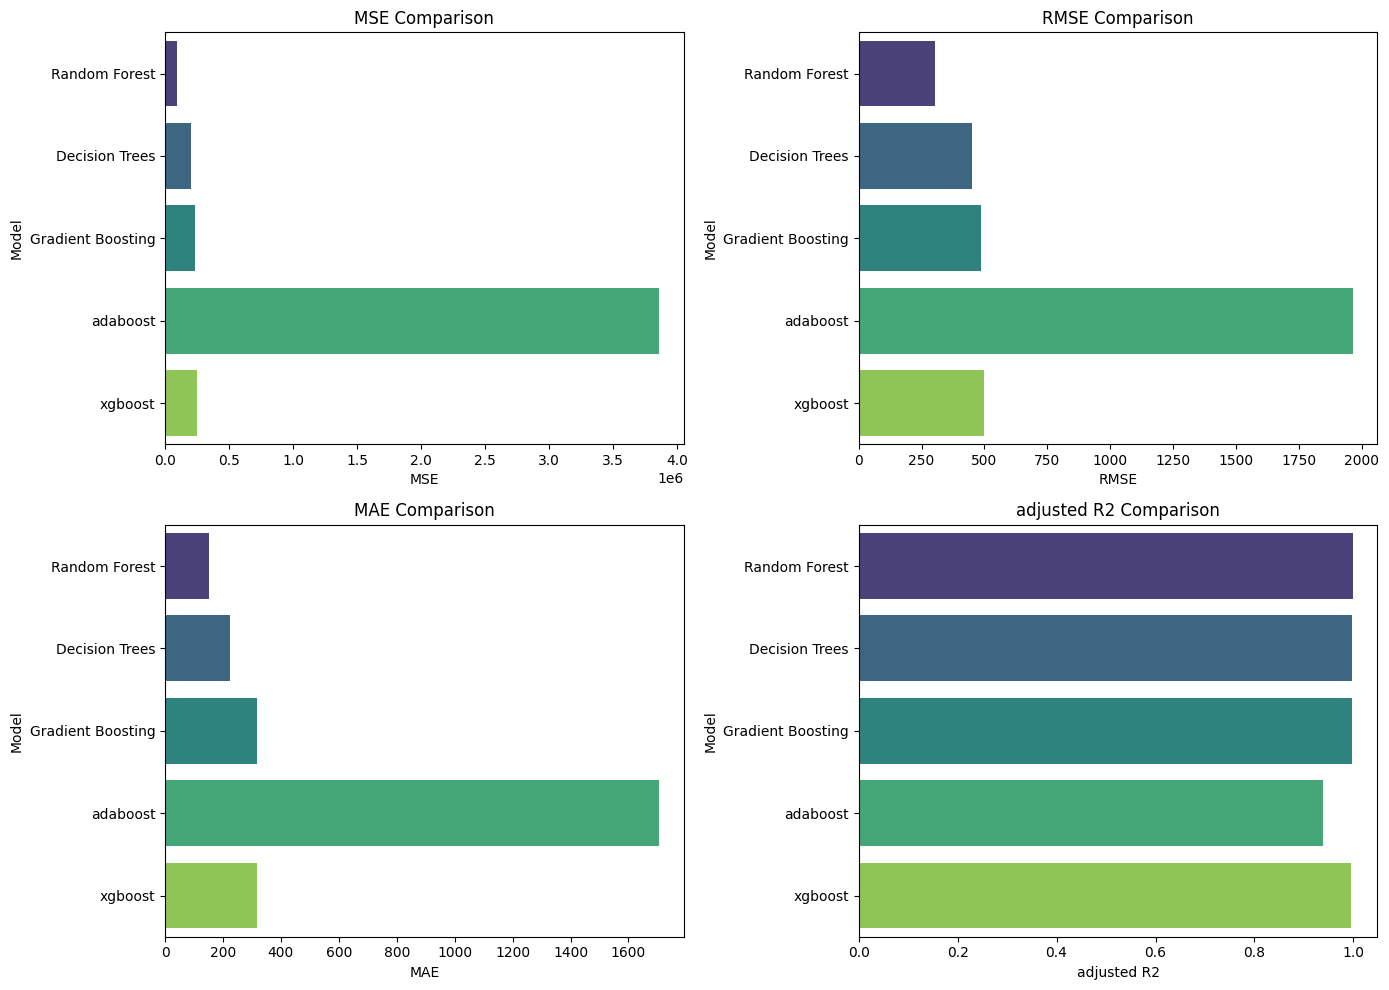

In [535]:
df_results = pd.DataFrame(evaluation_results)

plt.figure(figsize=(14, 10))
metrics = ['MSE', 'RMSE', 'MAE', 'adjusted R2']

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.barplot(x=metric, y='Model', data=df_results, palette='viridis', orient='h')
    plt.title(f'{metric} Comparison')
    plt.xlabel(metric)
    plt.ylabel('Model')

plt.tight_layout()
plt.show()


In [536]:
tuned_models = {}

for name, model in {
    "Random Forest": random_forest,
    "Decision Trees": decision_trees,
    "Gradient Boosting": gradient_boosting,
    "adaboost": adaboost_model,
    "xgboost": xgboost_model
}.items():
    print(f"Tuning {name}...")
    best_estimator = tune_model(model, param_grids[name], X_train, y_train)
    tuned_models[name] = best_estimator


Tuning Random Forest...
Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best R2 score: 0.9982
Tuning Decision Trees...
Best parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best R2 score: 0.9965
Tuning Gradient Boosting...
Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Best R2 score: 0.9992
Tuning adaboost...
Best parameters: {'learning_rate': 0.5, 'n_estimators': 100}
Best R2 score: 0.9418
Tuning xgboost...
Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Best R2 score: 0.9988


In [537]:
training_tuned_models(X_test, y_test)


Evaluation for Random Forest:
Mean Squared Error: 80602.5924
Root Mean Squared Error: 283.9060
Mean Absolute Error: 120.2974
adjusted_r2: 0.9987

Evaluation for Decision Trees:
Mean Squared Error: 165941.3792
Root Mean Squared Error: 407.3590
Mean Absolute Error: 170.0177
adjusted_r2: 0.9974

Evaluation for Gradient Boosting:
Mean Squared Error: 42917.8191
Root Mean Squared Error: 207.1662
Mean Absolute Error: 107.8369
adjusted_r2: 0.9993

Evaluation for adaboost:
Mean Squared Error: 3621705.7631
Root Mean Squared Error: 1903.0780
Mean Absolute Error: 1650.0586
adjusted_r2: 0.9422

Evaluation for xgboost:
Mean Squared Error: 47682.3537
Root Mean Squared Error: 218.3629
Mean Absolute Error: 114.9622
adjusted_r2: 0.9992



### After Hyperparameter Tuning

C:\Users\ahmed\AppData\Local\Temp\ipykernel_40628\1617466462.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric, y='Model', data=df_results, palette='viridis', orient='h')
C:\Users\ahmed\AppData\Local\Temp\ipykernel_40628\1617466462.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric, y='Model', data=df_results, palette='viridis', orient='h')
C:\Users\ahmed\AppData\Local\Temp\ipykernel_40628\1617466462.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric, y='Model', data=df_results, palette='viridis', orient='h')
C

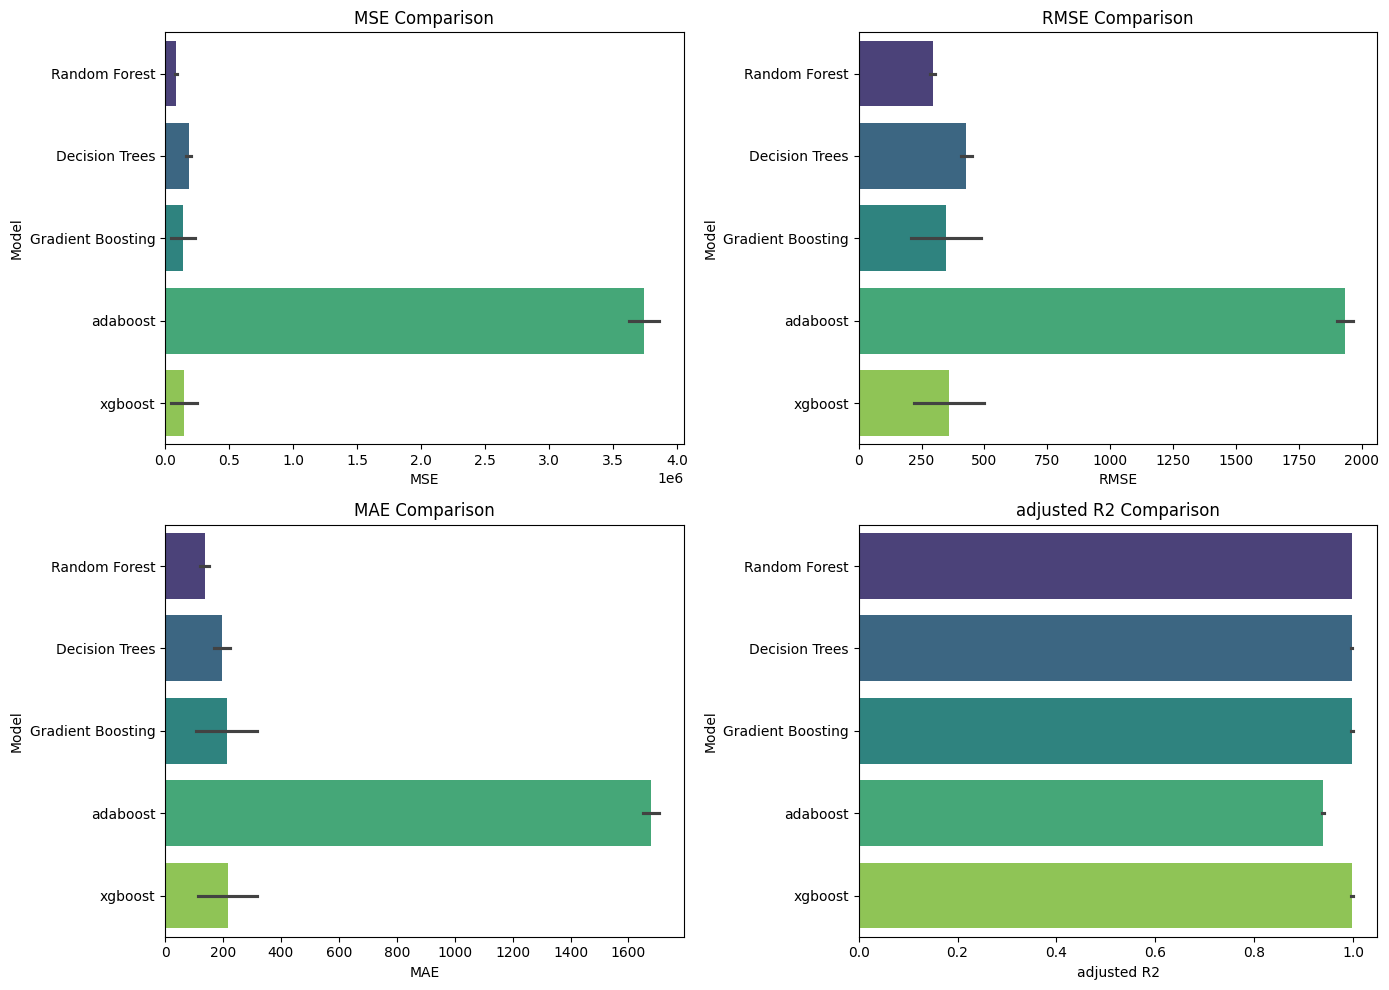

In [538]:
df_results = pd.DataFrame(evaluation_results)

plt.figure(figsize=(14, 10))
metrics = ['MSE', 'RMSE', 'MAE', 'adjusted R2']

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.barplot(x=metric, y='Model', data=df_results, palette='viridis', orient='h')
    plt.title(f'{metric} Comparison')
    plt.xlabel(metric)
    plt.ylabel('Model')

plt.tight_layout()
plt.show()


### Final Model Selection
After evaluating all models, Gradient Boosting was selected as the final model due to its outstanding performance and excellent generalization as evidenced by the highest adjusted R² (0.9993). Although XGBoost offered marginally better error metrics, Gradient Boosting was chosen because of its comparably high performance and its simpler and faster computational nature for this specific task. Moreover, Gradient Boosting demonstrated robust accuracy across the test data without overfitting or underfitting, making it the most suitable choice for this regression problem.

## Deploying final model

In [602]:
import pickle
# Save the tuned models
xgboost_model = TreeBasedModels(n_estimators=200, learning_rate=0.1, max_depth=5,model_type='xgboost')
xgboost_model.train(X_train, y_train)
pickle.dump(xgboost_model, open('xgboost_model_sales.pkl', 'wb'))

In [603]:
X.columns

Index(['_StoreID', '_ProductID', 'Order Quantity', 'Discount Applied',
       'Unit Price', 'year', 'day_of_month', 'week_of_year', 'month_sin',
       'month_cos', 'day_of_week_sin', 'day_of_week_cos',
       'Sales Channel_In-Store', 'Sales Channel_Online',
       'Sales Channel_Wholesale'],
      dtype='object')